In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import string
from string import punctuation
import nltk
import re

from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose    
from pmdarima import auto_arima  

C:\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
Data = pd.read_excel('C:\\Users\\Galaxy Computers\\Desktop\\Raw_Youtube_Comments.xlsx')

In [3]:
Data.head()

,Name,Comment,Time,Likes,Reply Count,Reply Author,Reply,Published,Updated
0,Beast,Birds knocking them out of the sky and droppin...,2023-06-23T13:16:02Z,0,0,NaN,NaN,NaN,NaN
1,Terabai Avionics System,"this technology needs to be polished, it has p...",2023-06-23T09:04:56Z,0,0,NaN,NaN,NaN,NaN
2,Kalie Parkin,What a stupid idea. This is just Jeff Bezos wa...,2023-06-14T13:18:45Z,0,0,NaN,NaN,NaN,NaN
3,M R,"<a href=""https://www.youtube.com/watch?v=J-M98...",2023-06-02T08:13:37Z,0,0,NaN,NaN,NaN,NaN
4,Samuel Francisco García,"Me gustó mucho, GRACIAS.",2023-05-30T22:08:54Z,1,0,NaN,NaN,NaN,NaN


## Data Preprocessing 

In [4]:
len(Data)

641821

In [5]:
df = Data[['Comment','Time','Likes','Reply Count']]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641821 entries, 0 to 641820
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Comment      522461 non-null  object
 1   Time         522461 non-null  object
 2   Likes        522429 non-null  object
 3   Reply Count  522429 non-null  object
dtypes: object(4)
memory usage: 19.6+ MB


In [7]:
df.dropna(inplace=True)

In [8]:
len(df)

522429

In [9]:
df.head()

,Comment,Time,Likes,Reply Count
0,Birds knocking them out of the sky and droppin...,2023-06-23T13:16:02Z,0,0
1,"this technology needs to be polished, it has p...",2023-06-23T09:04:56Z,0,0
2,What a stupid idea. This is just Jeff Bezos wa...,2023-06-14T13:18:45Z,0,0
3,"<a href=""https://www.youtube.com/watch?v=J-M98...",2023-06-02T08:13:37Z,0,0
4,"Me gustó mucho, GRACIAS.",2023-05-30T22:08:54Z,1,0


### Datatransformation

###### Data labelling


In [10]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

df['Comment'] = df['Comment'].astype(str)

sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Comment"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Comment"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Comment"]]
df['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in df["Comment"]]
score = df["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df["Sentiment"] = sentiment
df.head()

[nltk_data] Downloading package vader_lexicon to C:\Users\Galaxy
[nltk_data]     Computers\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Comment,Time,Likes,Reply Count,Positive,Negative,Neutral,Compound,Sentiment
0,Birds knocking them out of the sky and droppin...,2023-06-23T13:16:02Z,0,0,0.000,0.138,0.862,-0.3400,Negative
1,"this technology needs to be polished, it has p...",2023-06-23T09:04:56Z,0,0,0.000,0.000,1.000,0.0000,Neutral
2,What a stupid idea. This is just Jeff Bezos wa...,2023-06-14T13:18:45Z,0,0,0.041,0.207,0.752,-0.7033,Negative
3,"<a href=""https://www.youtube.com/watch?v=J-M98...",2023-06-02T08:13:37Z,0,0,0.109,0.087,0.804,0.4359,Positive
4,"Me gustó mucho, GRACIAS.",2023-05-30T22:08:54Z,1,0,0.000,0.000,1.000,0.0000,Neutral


In [11]:
df=df.drop(['Positive','Negative','Neutral','Compound'],axis=1)
df.head()

,Comment,Time,Likes,Reply Count,Sentiment
0,Birds knocking them out of the sky and droppin...,2023-06-23T13:16:02Z,0,0,Negative
1,"this technology needs to be polished, it has p...",2023-06-23T09:04:56Z,0,0,Neutral
2,What a stupid idea. This is just Jeff Bezos wa...,2023-06-14T13:18:45Z,0,0,Negative
3,"<a href=""https://www.youtube.com/watch?v=J-M98...",2023-06-02T08:13:37Z,0,0,Positive
4,"Me gustó mucho, GRACIAS.",2023-05-30T22:08:54Z,1,0,Neutral


In [12]:
import nltk
nltk.data.path.append("/path/to/nltk_data")
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\Galaxy
[nltk_data]     Computers\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
stop_words = stopwords.words('english')
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer() 
snowball_stemer = SnowballStemmer(language="english")
lzr = WordNetLemmatizer()

In [14]:
def text_processing(text):   

    text = text.lower()

    text = re.sub(r'\n',' ', text)

    text = re.sub('[%s]' % re.escape(punctuation), "", text)
    
    text = re.sub("^a-zA-Z0-9$,.", "", text)
    
    text = re.sub(r'\s+', ' ', text, flags=re.I)
 
    text = re.sub(r'\W', ' ', text)

    text = ' '.join([word for word in word_tokenize(text) if word not in stop_words])
  
    text=' '.join([lzr.lemmatize(word) for word in word_tokenize(text)])

    return text


In [15]:
import nltk
nltk.download('wordnet')

nltk.download('omw-1.4')
data_copy = df.copy()
data_copy.Comment = data_copy.Comment.apply(lambda text: text_processing(text))


[nltk_data] Downloading package wordnet to C:\Users\Galaxy
[nltk_data]     Computers\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Galaxy
[nltk_data]     Computers\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [16]:
le = LabelEncoder()
data_copy['Sentiment'] = le.fit_transform(data_copy['Sentiment'])

In [17]:
processed_data = {
    'Sentence':data_copy.Comment,
    'Sentiment':data_copy['Sentiment']
}

processed_data = pd.DataFrame(processed_data)
processed_data.head()

,Sentence,Sentiment
0,bird knocking sky dropping people people would...,0
1,technology need polished potential future,1
2,stupid idea jeff bezos wanting make money with...,0
3,hrefhttpswwwyoutubecomwatchvjm98klgauuampt17m3...,2
4,gustó mucho gracias,1


In [18]:
#Negative - 1
#Neutral - 0
#Positive - 2
processed_data['Sentiment'].value_counts()

2    274428
1    165726
0     82275
Name: Sentiment, dtype: int64

In [19]:
print(len(df))
print(len(processed_data))

522429
522429


In [20]:
processed_data.head()

,Sentence,Sentiment
0,bird knocking sky dropping people people would...,0
1,technology need polished potential future,1
2,stupid idea jeff bezos wanting make money with...,0
3,hrefhttpswwwyoutubecomwatchvjm98klgauuampt17m3...,2
4,gustó mucho gracias,1


In [21]:
data_copy.head()

,Comment,Time,Likes,Reply Count,Sentiment
0,bird knocking sky dropping people people would...,2023-06-23T13:16:02Z,0,0,0
1,technology need polished potential future,2023-06-23T09:04:56Z,0,0,1
2,stupid idea jeff bezos wanting make money with...,2023-06-14T13:18:45Z,0,0,0
3,hrefhttpswwwyoutubecomwatchvjm98klgauuampt17m3...,2023-06-02T08:13:37Z,0,0,2
4,gustó mucho gracias,2023-05-30T22:08:54Z,1,0,1


In [22]:
fin_data = pd.concat([data_copy[['Time', 'Likes', 'Reply Count']], processed_data[['Sentiment', 'Sentence']]], axis=1)


In [23]:
fin_data

,Time,Likes,Reply Count,Sentiment,Sentence
0,2023-06-23T13:16:02Z,0,0,0,bird knocking sky dropping people people would...
1,2023-06-23T09:04:56Z,0,0,1,technology need polished potential future
2,2023-06-14T13:18:45Z,0,0,0,stupid idea jeff bezos wanting make money with...
3,2023-06-02T08:13:37Z,0,0,2,hrefhttpswwwyoutubecomwatchvjm98klgauuampt17m3...
4,2023-05-30T22:08:54Z,1,0,1,gustó mucho gracias
...,...,...,...,...,...
641816,2023-03-19T06:48:12Z,0,0,1,plant v zombie music hrefhttpswwwyoutubecomwat...
641817,2023-03-19T06:47:06Z,0,0,2,motivated largely videowhat best way help via ...
641818,2023-03-19T06:47:06Z,1,0,2,cool question air traffic many business start ...
641819,2023-03-19T06:47:02Z,0,0,2,make want visit rwanda learn thing


###### Preprosessing for Analysis

In [24]:
fin_data['Likes'] = fin_data['Likes'].astype(str).str.replace('like', '1')
fin_data['Reply Count'] = fin_data['Reply Count'].astype(str).str.replace('Reply Count', '1')


In [25]:
fin_data.dropna(inplace=True)

In [28]:
fin_data.isnull().sum()

Time           0
Likes          2
Reply Count    0
Sentiment      0
Sentence       0
dtype: int64

In [29]:
fin_data['Likes'].fillna(0, inplace=True)
fin_data['Likes'] = pd.to_numeric(fin_data['Likes'], errors='coerce')
fin_data['Likes'] = fin_data['Likes'].astype('int64')

fin_data['Reply Count'] = pd.to_numeric(fin_data['Reply Count'], errors='coerce')
fin_data['Reply Count'] = fin_data['Reply Count'].astype('int64')



In [30]:
fin_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522429 entries, 0 to 641820
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Time         522429 non-null  object
 1   Likes        522429 non-null  int64 
 2   Reply Count  522429 non-null  int64 
 3   Sentiment    522429 non-null  int32 
 4   Sentence     522429 non-null  object
dtypes: int32(1), int64(2), object(2)
memory usage: 21.9+ MB


In [31]:
fin_data['Time'] = pd.to_datetime(fin_data['Time'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')


In [32]:
fin_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522429 entries, 0 to 641820
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Time         522427 non-null  datetime64[ns]
 1   Likes        522429 non-null  int64         
 2   Reply Count  522429 non-null  int64         
 3   Sentiment    522429 non-null  int32         
 4   Sentence     522429 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(2), object(1)
memory usage: 21.9+ MB


In [33]:
fin_data

,Time,Likes,Reply Count,Sentiment,Sentence
0,2023-06-23 13:16:02,0,0,0,bird knocking sky dropping people people would...
1,2023-06-23 09:04:56,0,0,1,technology need polished potential future
2,2023-06-14 13:18:45,0,0,0,stupid idea jeff bezos wanting make money with...
3,2023-06-02 08:13:37,0,0,2,hrefhttpswwwyoutubecomwatchvjm98klgauuampt17m3...
4,2023-05-30 22:08:54,1,0,1,gustó mucho gracias
...,...,...,...,...,...
641816,2023-03-19 06:48:12,0,0,1,plant v zombie music hrefhttpswwwyoutubecomwat...
641817,2023-03-19 06:47:06,0,0,2,motivated largely videowhat best way help via ...
641818,2023-03-19 06:47:06,1,0,2,cool question air traffic many business start ...
641819,2023-03-19 06:47:02,0,0,2,make want visit rwanda learn thing


In [34]:
fin_data['date'] = pd.to_datetime(fin_data['Time']).dt.date.astype(str)
fin_data['date'] = fin_data['date'].str[:10]

## let's visualize the data

In [58]:
time_s = fin_data.drop('Sentence', axis=1).copy()

In [59]:
time_s

,Time,Likes,Reply Count,Sentiment,date
0,2023-06-23 13:16:02,0,0,0,2023-06-23
1,2023-06-23 09:04:56,0,0,1,2023-06-23
2,2023-06-14 13:18:45,0,0,0,2023-06-14
3,2023-06-02 08:13:37,0,0,2,2023-06-02
4,2023-05-30 22:08:54,1,0,1,2023-05-30
...,...,...,...,...,...
641816,2023-03-19 06:48:12,0,0,1,2023-03-19
641817,2023-03-19 06:47:06,0,0,2,2023-03-19
641818,2023-03-19 06:47:06,1,0,2,2023-03-19
641819,2023-03-19 06:47:02,0,0,2,2023-03-19


In [60]:
time_s.set_index('date',inplace=True)
time_s.index.freq = 'MS'
time_s.head()

,Time,Likes,Reply Count,Sentiment
date,,,,
2023-06-23,2023-06-23 13:16:02,0,0,0
2023-06-23,2023-06-23 09:04:56,0,0,1
2023-06-14,2023-06-14 13:18:45,0,0,0
2023-06-02,2023-06-02 08:13:37,0,0,2
2023-05-30,2023-05-30 22:08:54,1,0,1


In [61]:
time_s.dropna(inplace=True)

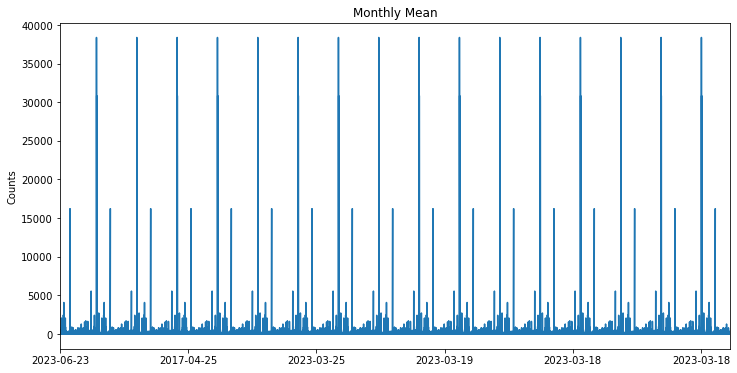

In [81]:
title = 'Monthly Mean'
ylabel='Counts'
xlabel='' # we don't really need a label here

ax = time_s['Likes'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

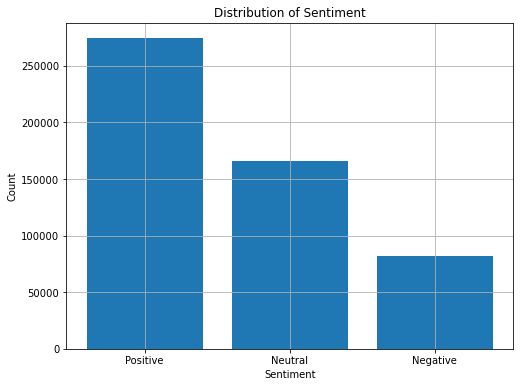

In [68]:
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment')
plt.grid(True)
plt.show()

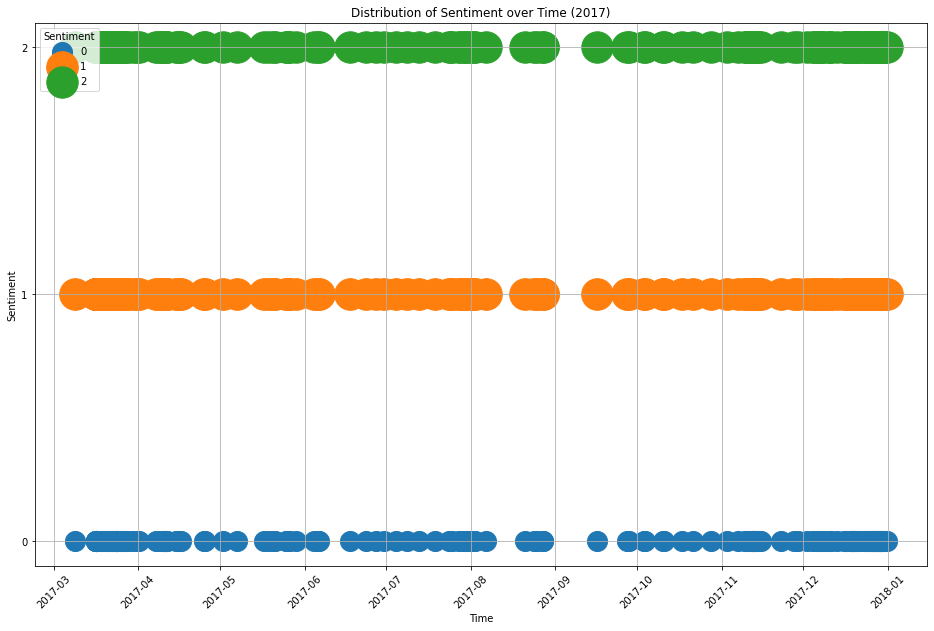

In [80]:
time_s_2017 = time_s[time_s['Time'].dt.year == 2017]
sentiment_counts = time_s_2017.groupby(['Time', 'Sentiment']).size().unstack(fill_value=0)

sentiment_values = [0, 1, 2]
total_counts = sentiment_counts.sum()
normalized_counts = total_counts / total_counts.max()
plt.figure(figsize=(16, 10))
for sentiment in sentiment_values:
    plt.scatter(sentiment_counts.index, [sentiment] * len(sentiment_counts),
                s=1000 * normalized_counts[sentiment], label=sentiment)

plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.title('Distribution of Sentiment over Time (2017)')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.yticks(sentiment_values)
plt.grid(True)
plt.show()


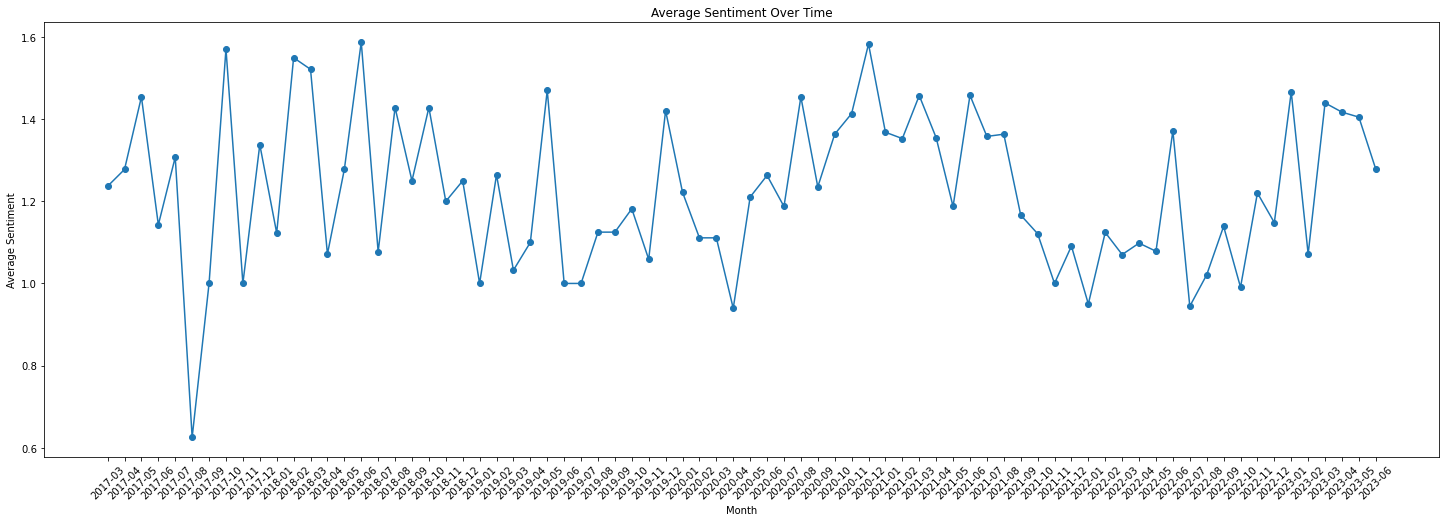

In [64]:

time_s['Time'] = pd.to_datetime(time_s['Time'], unit='s')
time_s['Month'] = time_s['Time'].dt.to_period('M')

monthly_sentiment = time_s.groupby('Month')['Sentiment'].mean()
monthly_sentiment.index = monthly_sentiment.index.astype(str)

plt.figure(figsize=(25, 8))
plt.plot(monthly_sentiment.index, monthly_sentiment.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment Over Time')
plt.xticks(rotation=45)
plt.show()
